# Proyek Analisis Data: Air-quality-dataset
- **Nama:** I Made Sandika Wijaya
- **Email:** sandikakadek2018@gmail.com
- **ID Dicoding:** I Made Sandika Wijaya

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polusi dawi waktu ke waktu?
- Kapan waktu polusi tertinggi?
- Daerah mana yang memiliki polusi udara tertinggi?
- Bagaimana kelompok kategori polusi udara?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Data Wrangling

### Gathering Data

In [ ]:
aot_df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv", delimiter=",")
aot_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:

cha_df = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv", delimiter=",")
cha_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [ ]:
din_df = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv", delimiter=",")
din_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [ ]:
don_df = pd.read_csv("PRSA_Data_Dongsi_20130301-20170228.csv", delimiter=",")
don_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [ ]:
gua_df = pd.read_csv("PRSA_Data_Guanyuan_20130301-20170228.csv", delimiter=",")
gua_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [ ]:
guc_df = pd.read_csv("PRSA_Data_Gucheng_20130301-20170228.csv", delimiter=",")
guc_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [ ]:
hua_df = pd.read_csv("PRSA_Data_Huairou_20130301-20170228.csv", delimiter=",")
hua_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [ ]:
non_df = pd.read_csv("PRSA_Data_Nongzhanguan_20130301-20170228.csv", delimiter=",")
non_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [ ]:
shu_df = pd.read_csv("PRSA_Data_Shunyi_20130301-20170228.csv", delimiter=",")
shu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [ ]:
tia_df = pd.read_csv("PRSA_Data_Tiantan_20130301-20170228.csv", delimiter=",")
tia_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [ ]:
wan_df = pd.read_csv("PRSA_Data_Wanliu_20130301-20170228.csv", delimiter=",")
wan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [ ]:
wans_df = pd.read_csv("PRSA_Data_Wanshouxigong_20130301-20170228.csv", delimiter=",")
wans_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


In [ ]:
dfs = [
    aot_df, cha_df, din_df, don_df, gua_df, guc_df,
    hua_df, non_df, shu_df, tia_df, wan_df, wans_df
]

aqi_df = pd.concat(dfs, axis=0, ignore_index=True)

**Insight:**
- Total dataset terdiri dari 12 file `.csv`
- 12 file `.csv` tersebut memiliki kolom header yang sama
- Masing-masing dataset digabungkan menjadi satu dataset `aqi_df`

### Assessing Data

In [ ]:
aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [ ]:
aqi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [ ]:
aqi_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [ ]:
aqi_df.duplicated().sum()

np.int64(0)

**Insight:**
- Terdapat data `null` yang cukup banyak
- Tidak terdapat data double (duplicate data)

### Cleaning Data

In [ ]:
aqi_df['datetime'] = pd.to_datetime(aqi_df[['year','month','day','hour']])
aqi_df = aqi_df.sort_values(['station','datetime'])

In [ ]:
aqi_df = aqi_df.groupby('station', group_keys=False).apply(
    lambda group: group.set_index('datetime')
                        .interpolate(method='time')
).reset_index()

/tmp/ipython-input-48532122.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  .interpolate(method='time')
/tmp/ipython-input-48532122.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  .interpolate(method='time')
/tmp/ipython-input-48532122.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  .interpolate(method='time')
/tmp/ipython-input-48532122.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  .interpolate(method='time')
/tmp/ipython-input-48532122.py:3: FutureWarning: DataFrame.inter

In [ ]:
aqi_df['wd'] = aqi_df.groupby('station')['wd'].fillna(method='ffill')

/tmp/ipython-input-3184750435.py:1: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  aqi_df['wd'] = aqi_df.groupby('station')['wd'].fillna(method='ffill')
/tmp/ipython-input-3184750435.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aqi_df['wd'] = aqi_df.groupby('station')['wd'].fillna(method='ffill')


In [ ]:
aqi_df.dropna(inplace=True)

**Insight:**
- Mengurutkan data berdasarkan `station` dan `datetime`
- Mengisi data `null` dengan interpolasi
- Menghapus data `null`

## Exploratory Data Analysis (EDA)

### Explore Pollution Time by Time

In [ ]:
daily_pm25 = aqi_df.groupby('datetime')['PM2.5'].mean()
daily_pm25

,PM2.5
datetime,
2013-03-01 00:00:00,5.800000
2013-03-01 01:00:00,6.900000
2013-03-01 02:00:00,5.727273
2013-03-01 03:00:00,6.000000
2013-03-01 04:00:00,4.818182
...,...
2017-02-28 19:00:00,16.083333
2017-02-28 20:00:00,19.000000
2017-02-28 21:00:00,15.666667


### Explore Mean per Station

In [ ]:
cols = ['PM2.5','PM10','SO2','NO2','CO','O3',
        'TEMP','PRES','DEWP','RAIN','WSPM']

mean_station = aqi_df.groupby('station').mean(numeric_only=True)

mean_station[cols].round(2)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
station,,,,,,,,,,,
Aotizhongxin,82.54,110.21,17.46,59.07,1264.69,55.33,13.58,1011.85,3.12,0.07,1.71
Changping,70.99,94.79,14.94,44.21,1156.99,57.98,13.67,1007.77,1.49,0.06,1.85
Dingling,66.85,84.12,11.80,27.31,925.15,70.53,13.67,1007.77,1.49,0.06,1.85
Dongsi,86.14,110.35,18.51,53.95,1331.91,57.70,13.67,1012.55,2.45,0.06,1.86
Guanyuan,82.90,109.37,17.61,58.14,1258.33,54.82,13.58,1011.85,3.12,0.07,1.71
Gucheng,84.12,119.32,15.71,55.85,1338.41,57.99,13.86,1008.83,2.61,0.06,1.34
Huairou,69.50,92.42,12.45,32.08,1019.67,60.87,12.43,1007.61,2.22,0.07,1.65
Nongzhanguan,85.08,109.38,18.76,58.10,1327.77,58.43,13.67,1012.55,2.45,0.06,1.86
Shunyi,79.44,99.27,13.45,44.09,1197.90,54.22,13.38,1013.07,2.45,0.06,1.81


### Average Mean PM2.5 per Station

In [ ]:
pm25_mean_station = aqi_df.groupby('station').mean(numeric_only=True)
pm25_mean_station = pm25_mean_station.sort_values('PM2.5', ascending=False)

pm25_mean_station['PM2.5'].round(2)

print(f'Average PM2.5 per Station:\n{pm25_mean_station["PM2.5"].round(2).sort_values(ascending=False)}\n')
print(f'Average PM2.5: {pm25_mean_station["PM2.5"].mean().round(2)}')

Average PM2.5 per Station:
station
Dongsi           86.14
Nongzhanguan     85.08
Wanshouxigong    85.07
Gucheng          84.12
Wanliu           83.47
Guanyuan         82.90
Aotizhongxin     82.54
Tiantan          82.03
Shunyi           79.44
Changping        70.99
Huairou          69.50
Dingling         66.85
Name: PM2.5, dtype: float64

Average PM2.5: 79.84


In [ ]:
aqi_df['year_month'] = pd.to_datetime(
  aqi_df[['year','month']].assign(day=1)
)

In [ ]:
year_monthly_pm25 = (
  aqi_df
  .groupby('year_month')['PM2.5']
  .mean()
)

print(f'Montly Average of PM2.5:\n{year_monthly_pm25.head()}')

Montly Average of PM2.5:
year_month
2013-03-01    104.812486
2013-04-01     62.207292
2013-05-01     81.876512
2013-06-01    101.542242
2013-07-01     66.839665
Name: PM2.5, dtype: float64


In [ ]:
yearly_mean_pm25 = (
  aqi_df
  .groupby('year')['PM2.5']
  .mean()
  .reset_index()
)

print(f'Rata-rata PM2.5 per tahun:\n{yearly_mean_pm25}\n')
print(f'Tahun dengan rata-rata PM.25 tertinggi: {yearly_mean_pm25["PM2.5"].idxmax()}, dengan rata-rata {yearly_mean_pm25["PM2.5"].round(2).max()}')

Rata-rata PM2.5 per tahun:
   year      PM2.5
0  2013  79.786677
1  2014  86.183671
2  2015  79.306423
3  2016  72.078419
4  2017  92.407898

Tahun dengan rata-rata PM.25 tertinggi: 4, dengan rata-rata 92.41


In [ ]:
monthly_mean_pm25 = (
  aqi_df
  .groupby('month')['PM2.5']
  .mean()
  .reset_index()
)

print(f'Rata-rata PM2.5 per bulan:\n{monthly_mean_pm25}\n')
print(f'Bulan dengan rata-rata PM.25 tertinggi: {monthly_mean_pm25["PM2.5"].idxmax()}, dengan rata-rata {monthly_mean_pm25["PM2.5"].round(2).max()}')

Rata-rata PM2.5 per bulan:
    month       PM2.5
0       1   93.760559
1       2   89.213391
2       3   94.648177
3       4   73.367153
4       5   63.541148
5       6   68.837547
6       7   71.401115
7       8   53.465479
8       9   61.281071
9      10   91.715859
10     11   93.323963
11     12  103.679184

Bulan dengan rata-rata PM.25 tertinggi: 11, dengan rata-rata 103.68


**Insight:**
- Rata-rata nilai PM2.5 adalah 78.84
- Nilai PM2.5 tertinggi berdasarkan waktu:
  - Tahun: 2017, dengan PM2.5: 92.41
  - Bulan: 11 (November), dengan PM2.5: 103.68

In [ ]:
aqi_df

,datetime,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,year_month
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01
1,2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01
2,2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01
4,2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,2017-02-28 19:00:00,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-01
420764,2017-02-28 20:00:00,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-01
420765,2017-02-28 21:00:00,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-01
420766,2017-02-28 22:00:00,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-01


In [ ]:
conditions = [
    (aqi_df['hour'] >= 5) & (aqi_df['hour'] <= 10),
    (aqi_df['hour'] >= 11) & (aqi_df['hour'] <= 14),
    (aqi_df['hour'] >= 15) & (aqi_df['hour'] <= 17),
    (aqi_df['hour'] >= 18) | (aqi_df['hour'] <= 4)
]

choices = ['pagi', 'siang', 'sore', 'malam']

aqi_df['waktu'] = np.select(conditions, choices, default='other')

In [ ]:
aqi_df.head()

,datetime,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,...,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,year_month,waktu
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,4.0,7.0,...,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,malam
1,2013-03-01 01:00:00,2,2013,3,1,1,8.0,8.0,4.0,7.0,...,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,malam
2,2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,5.0,10.0,...,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,malam
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,11.0,11.0,...,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,malam
4,2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,12.0,12.0,...,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,malam


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Tren Polusi dari Waktu ke Waktu?

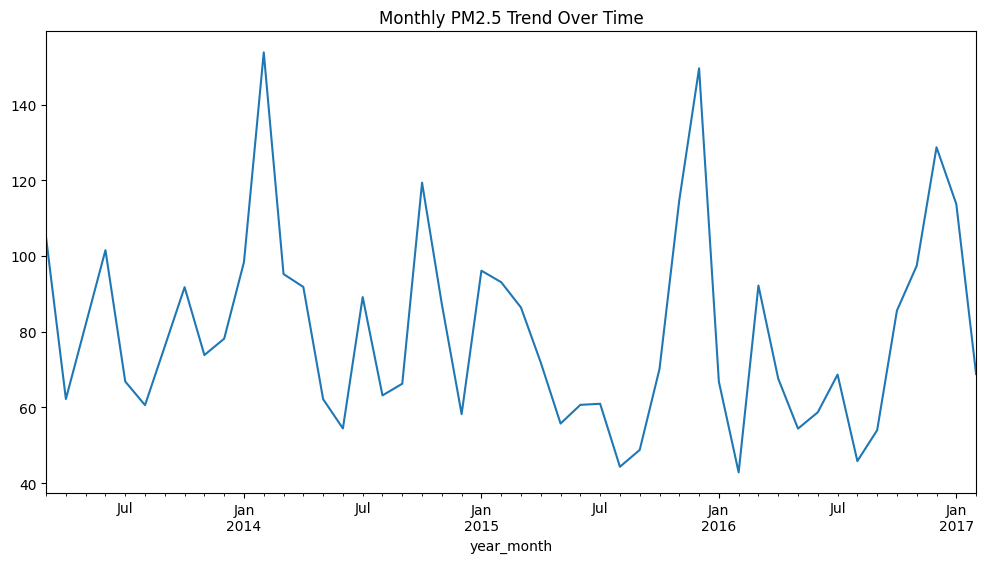

In [ ]:
year_monthly_pm25.plot(figsize=(12,6))
plt.title("Monthly PM2.5 Trend Over Time")
plt.show()

### Pertanyaan 2: Kapan Waktu Polusi Tertinggi?

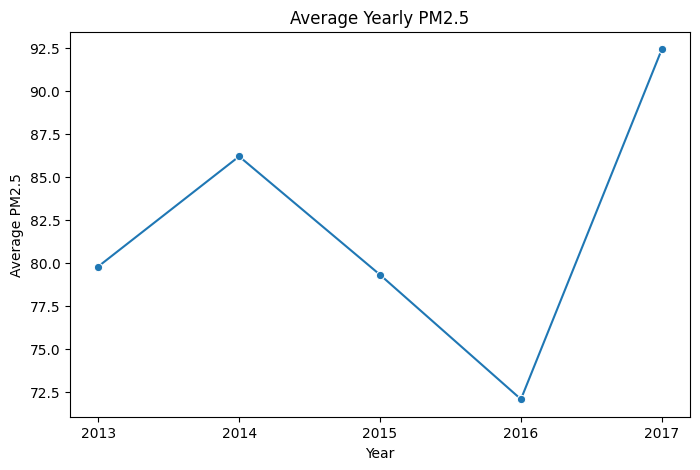

In [ ]:
plt.figure(figsize=(8,5))

sns.lineplot(
  data=yearly_mean_pm25,
  x='year',
  y='PM2.5',
  marker='o'
)

plt.xlabel("Year")
plt.ylabel("Average PM2.5")
plt.title("Average Yearly PM2.5")
plt.xticks(yearly_mean_pm25['year'])
plt.show()

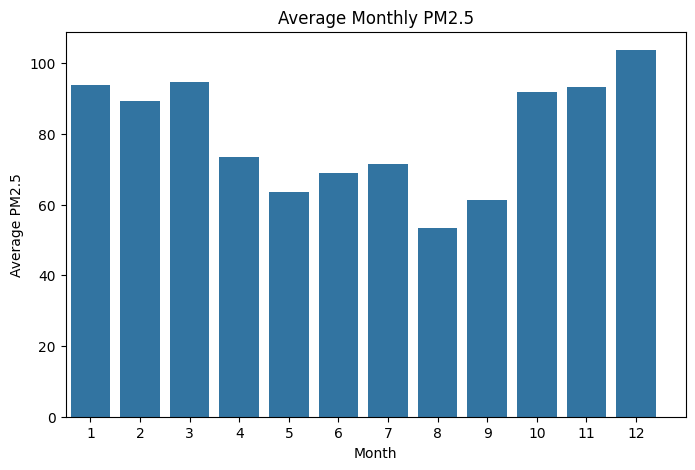

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
  data=monthly_mean_pm25,
  x='month',
  y='PM2.5'
)

plt.xticks(range(1,13))
plt.xlabel("Month")
plt.ylabel("Average PM2.5")
plt.title("Average PM2.5 by Month")
plt.xticks(range(0,12))
plt.show()

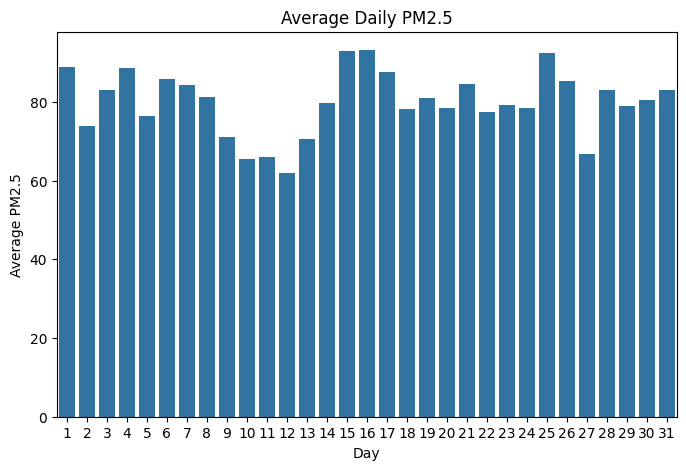

In [ ]:
daily_mean = (
  aqi_df
  .groupby('day')['PM2.5']
  .mean()
  .reset_index()
)

plt.figure(figsize=(8,5))
sns.barplot(
  data=daily_mean,
  x='day',
  y='PM2.5'
)

plt.xticks(range(1,13))
plt.xlabel("Day")
plt.ylabel("Average PM2.5")
plt.title("Average PM2.5 by Day")
plt.xticks(range(0, 31))
plt.show()

### Pertanyaan 3: Daerah Mana yang Memiliki Polusi Tertinggi?

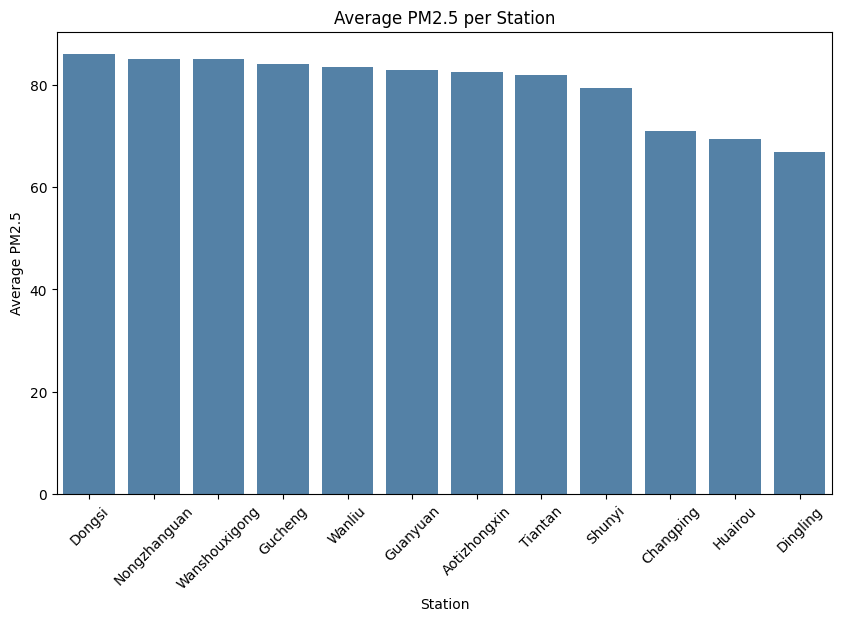

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=pm25_mean_station,
    x='station',
    y='PM2.5',
    color='steelblue'
)

plt.xticks(rotation=45)
plt.xlabel("Station")
plt.ylabel("Average PM2.5")
plt.title("Average PM2.5 per Station")

plt.show()

### Pertanyaan 4: Bagaimana Kelompok Kategori Polusi Udara?

In [ ]:
def categorize(pm):
  if pm <= 35:
    return 'Good'
  elif pm <= 75:
    return 'Moderate'
  elif pm <= 150:
    return 'Unhealthy'
  else:
    return 'Hazardous'

aqi_df['AQI_Category'] = aqi_df['PM2.5'].apply(categorize)

/tmp/ipython-input-257209722.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


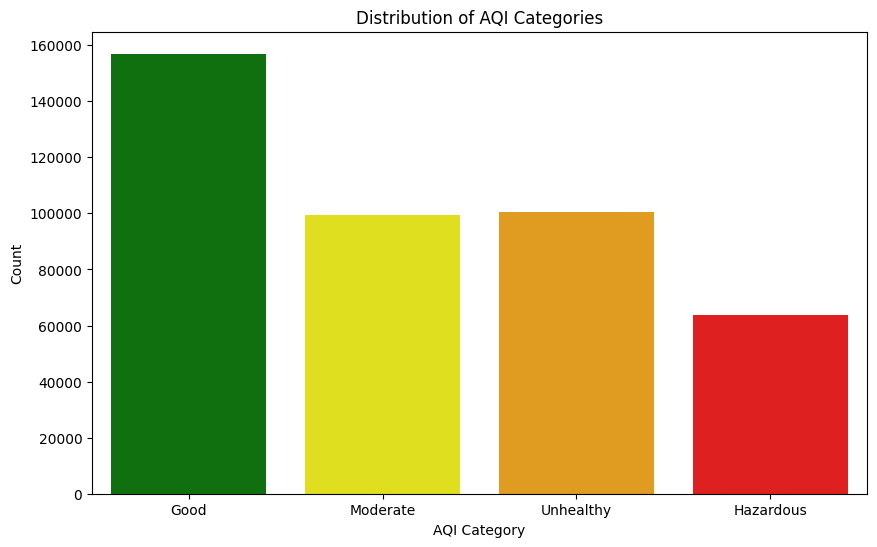

In [ ]:
order = ['Good', 'Moderate', 'Unhealthy', 'Hazardous']

plt.figure(figsize=(10, 6))

sns.countplot(
    data=aqi_df,
    x='AQI_Category',
    order=order,
    palette={
        'Good': 'green',
        'Moderate': 'yellow',
        'Unhealthy': 'orange',
        'Hazardous': 'red'
    }
)

plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.title('Distribution of AQI Categories')
plt.show()

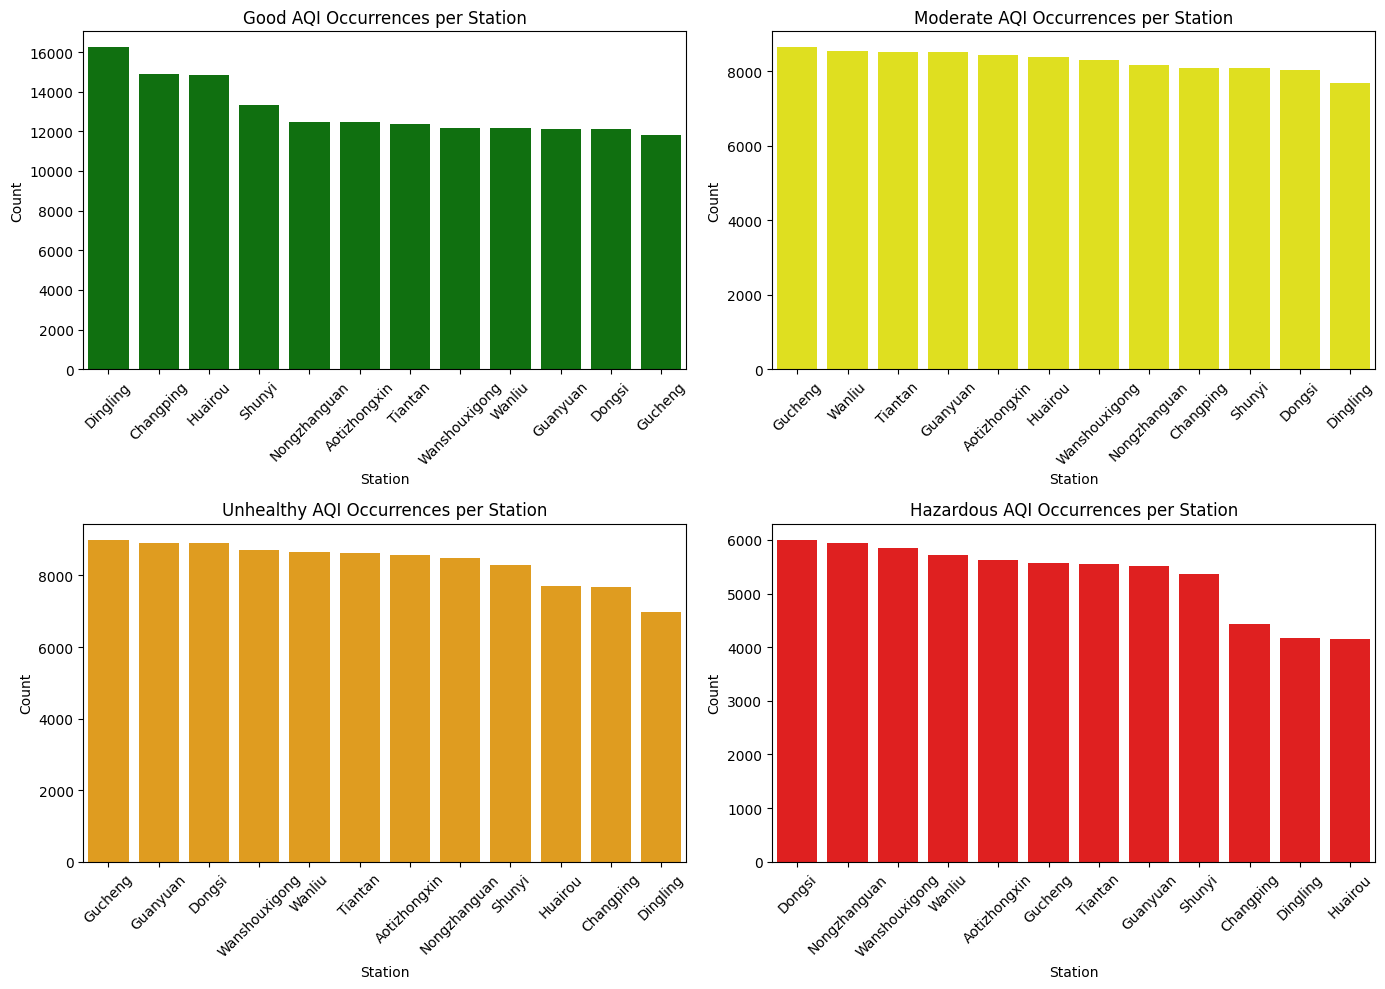

In [ ]:
categories = ['Good','Moderate','Unhealthy','Hazardous']
colors = {
  'Good':'green',
  'Moderate':'yellow',
  'Unhealthy':'orange',
  'Hazardous':'red'
}

fig, axes = plt.subplots(2, 2, figsize=(14,10))
axes = axes.flatten()

for i, cat in enumerate(categories):

  cat_count = (
    aqi_df[aqi_df['AQI_Category'] == cat]
    .groupby('station')
    .size()
    .sort_values(ascending=False)
  )

  sns.barplot(
    x=cat_count.index,
    y=cat_count.values,
    color=colors[cat],
    ax=axes[i]
  )

  axes[i].set_title(f"{cat} AQI Occurrences per Station")
  axes[i].set_xlabel("Station")
  axes[i].set_ylabel("Count")
  axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Insight:**
- Polusi tertinggi terjadi pada 2017 dengan terendah 2016
- Polusi tertinggi terjadi pada bulan Desember dan terendah pada bulan Agustus
- Station dengan rata-rata polusi tertinggi adalah Dongsi
- Berdasarkan kategori AQI:
	- Kategori AQI “Good” paling banyak terjadi di stasiun Dingling, dan paling sedikit di Gucheng.
	- Kategori AQI “Moderate” paling banyak terjadi di Gucheng, dan paling sedikit di Dingling.
	- Kategori AQI “Unhealthy” paling banyak terjadi di Gucheng, dan paling sedikit di Dingling.
	- Kategori AQI “Hazardous” paling banyak terjadi di Dongsi, dan paling sedikit di Huairou.

## Analisis Lanjutan (Opsional)

In [ ]:
cols = ['PM2.5','PM10','SO2','NO2','CO','O3']

X = mean_station[cols]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

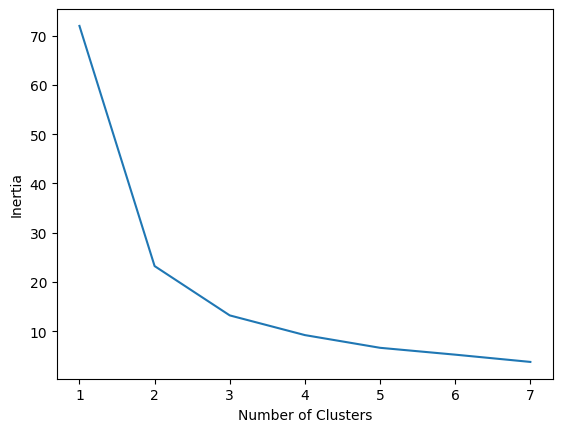

In [ ]:
inertia = []
K = range(1, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

mean_station['cluster'] = clusters

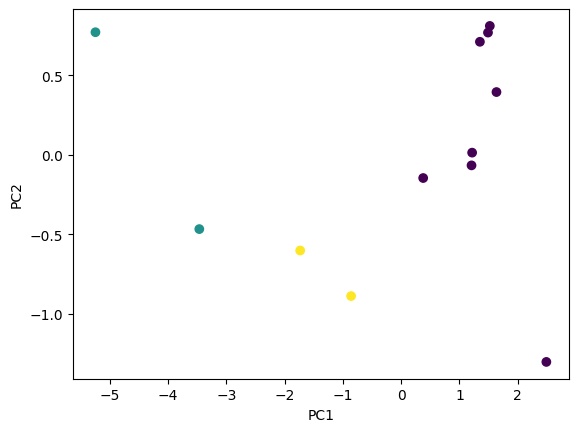

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
mean_station.groupby('cluster')['PM2.5'].mean()

,PM2.5
cluster,
0,83.918588
1,68.175401
2,75.212200


## Conclusion

- Bagaimana tren polusi dawi waktu ke waktu?
  - Secara tahunan, terjadi kenaikan dari 2013 ke 2014, kemudian penurunan hingga 2016 (tahun terendah), dan lonjakan signifikan pada 2017 (tahun tertinggi).
  - Secara bulanan, puncak tertinggi terjadi pada Februari 2014 dan Januari 2016, serta kembali tinggi pada Januari 2017.
  - Secara musiman, polusi konsisten tinggi pada Desember–Februari dan rendah pada Juli–Agustus (terendah pada Agustus 2016).
  - Secara harian, pola relatif stabil tanpa lonjakan ekstrem, dengan kecenderungan sedikit lebih tinggi di pertengahan hingga akhir bulan.

- Kapan waktu polusi tertinggi?
  - Tren Tahunan
    - Polusi tertinggi terjadi pada tahun 2017.
    - Polusi terendah terjadi pada tahun 2016.
  - Tren Bulanan
    - Tertinggi: Bulan Desember, diikuti Januari dan November.
    - Terendah: Bulan Agustus, diikuti Juli.
  - Tren Harian
    - Relatif stabil di kisaran yang mirip.
    - Tidak ada lonjakan ekstrem antar hari.
    - Sedikit lebih tinggi di pertengahan dan akhir bulan.
  
- Daerah mana yang memiliki polusi udara tertinggi?
    - Polusi udara tertinggi: Dongsi, yaitu 86.14
    - Polusi udara terendah: Dingling, yaitu 66.85

- Bagaimana kelompok kategori polusi udara?
  - Good: kategori dengan jumlah terbanyak, yang berarti sebagian besar waktu kualitas udara berada pada kondisi baik.
  - Moderate dan Unhealthy: memiliki jumlahnya relatif mirip dan berada di tingkat menengah, yang menunjukkan cukup banyak periode dengan kualitas udara yang mulai berdampak pada kesehatan.
  - Hazardous: kategori dengan jumlah paling sedikit, namun tetap muncul secara signifikan, menandakan masih terdapat periode dengan polusi sangat berbahaya.

In [ ]:
aqi_df.to_csv('data.csv', index=False)